## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [21]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [22]:
#import the useful libraries.
import pandas as pd
import seaborn as sns

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [23]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0=pd.read_csv('dataset/bank_marketing_updated_v1.csv',skiprows=2)    #use skiprows to skip the rows

In [24]:
#Print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [25]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [26]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
customerid    45211 non-null int64
age           45191 non-null float64
salary        45211 non-null int64
balance       45211 non-null int64
marital       45211 non-null object
jobedu        45211 non-null object
targeted      45211 non-null object
default       45211 non-null object
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45161 non-null object
duration      45211 non-null object
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
response      45181 non-null object
dtypes: float64(1), int64(7), object(11)
memory usage: 6.6+ MB


In [27]:
#convert the age variable data type from float to integer.
inp0.describe()

,customerid,age,salary,balance,day,campaign,pdays,previous
count,45211.000000,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,13051.435847,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [28]:
#print the average age of customers.


#### Dropping customer id column. 

In [29]:
#drop the customer id as it is of no use.
inp0=inp0.iloc[:,1:]
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [30]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0['jobedu'].apply(lambda x : x.split(',')[0])
inp0.job.head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [31]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0['jobedu'].apply(lambda x : x.split(',')[1])
inp0.education.head()

0     tertiary
1    secondary
2    secondary
3      unknown
4      unknown
Name: education, dtype: object

In [32]:
#drop the "jobedu" column from the dataframe.
inp0=inp0.drop(['jobedu'],axis=1)

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [33]:
#count the missing values in age column.
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [34]:
#pring the shape of dataframe inp0
inp0.shape[0]

45211

In [35]:
#calculate the percentage of missing values in age column.
(inp0.isnull().sum()['age']/inp0.shape[0])*100

0.0442370219636814

Drop the records with age missing. 

In [36]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1=inp0[~inp0.age.isnull()]

### **handling missing values in month column(Substituting missing value with mode)**

In [37]:
#count the missing values in month column in inp1.
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [38]:
#print the percentage of each month in the data frame inp1.
(inp1.isnull().sum()['month']/inp1.shape[0])*100

0.11064149941360005

In [39]:
#find the mode of month in inp1
inp1.month.describe() #top is may 2017

count         45141
unique           12
top       may, 2017
freq          13740
Name: month, dtype: object

#### Cleaning the month column 

In [40]:
### extracting only the month from month column
#inp1.month.apply(lambda x : x.split(',')[0])

In [41]:
### 

In [42]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna('may',inplace=True)

In [43]:
#let's see the null values in the month column.
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### handling missing values in response column 

In [44]:
#count the missing values in response column in inp1.
inp1[inp1.response.isnull()].head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
1016,37.0,20000,139,divorced,yes,no,yes,no,unknown,7,"may, 2017",71 sec,1,-1,0,unknown,NaN,blue-collar,primary
2027,33.0,60000,0,married,yes,no,yes,yes,unknown,9,"may, 2017",173 sec,2,-1,0,unknown,NaN,technician,secondary
2568,31.0,20000,81,married,yes,no,yes,no,unknown,13,"may, 2017",245 sec,4,-1,0,unknown,NaN,blue-collar,primary
2695,38.0,20000,0,married,yes,no,no,no,unknown,13,"may, 2017",209 sec,2,-1,0,unknown,NaN,blue-collar,primary
5258,37.0,60000,0,married,yes,no,yes,no,unknown,23,"may, 2017",412 sec,6,-1,0,unknown,NaN,technician,secondary


In [45]:
#calculate the percentage of missing values in response column. 
inp1.response.isnull().sum()/inp1.shape[0]

0.0006638489964816003

Target variable is better of not imputed.
- Drop the records with missing values.

In [46]:
#drop the records with response missings in inp1.
inp1=inp1[~inp1.response.isnull()]

In [47]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [48]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [49]:
#describe the pdays column with considering the -1 values.
import numpy as np
inp1.pdays=inp1.pdays.apply(lambda x : np.NaN if x<0 else x)
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [50]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

(array([ 1336., 11733., 12909.,  8007.,  7058.,  3310.,   375.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

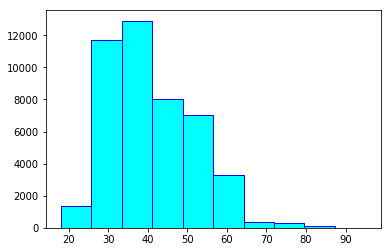

In [51]:
#plot the histogram of age variable.
import matplotlib.pyplot as plt
plt.hist(inp1.age,edgecolor='blue',color='cyan')

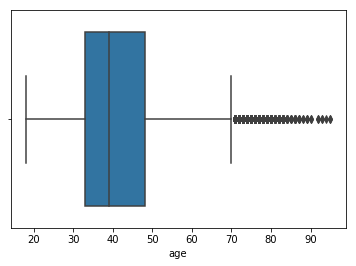

In [52]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)

#### Salary variable 

In [53]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

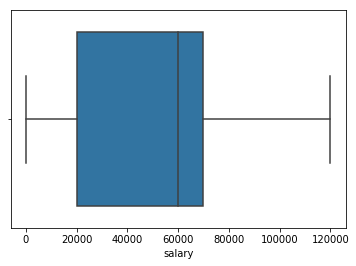

In [54]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)

#### Balance variable 

In [55]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

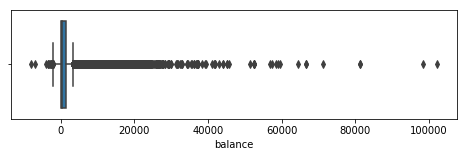

In [56]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)

In [57]:
#plot the boxplot of balance variable after scaling in 8:2.


In [58]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
np.quantile(inp1.balance,[0.5,0.7,0.9,0.95,0.99])

array([  448. ,  1126. ,  3576. ,  5769. , 13173.4])

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [59]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [60]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration.value_counts().head()

1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
2.03333333333333 min    127
1.73333333333333 min    127
Name: duration, dtype: int64

In [61]:
inp1.duration=inp1.duration.apply(lambda x : float(x.split(' ')[0]) if x.split(' ')[1]=='min' else float(x.split(' ')[0])/60)


In [62]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

### FIXING INVALID VALUES AND FILTER DATA

- Encode unicode properly: In case the data is being read as junk characters, try to change the encoding, for example, use CP1252 instead of UTF-8.

- Convert incorrect data types: Change the incorrect data types to the correct data types for ease of analysis. For example, if numeric values are stored as strings, then it would not be possible to calculate metrics such as mean, median, etc. Some of the common data type corrections include changing a string to a number ("12,300" to “12300”), a string to a date ("2013-Aug" to “2013/08”), a number to a string (“PIN Code 110001” to "110001"), etc.

- Correct the values that lie beyond the range: If some values lie beyond the logical range, for example, temperature less than -273° C (0° K), then you would need to correct those values as required. A close look at the data set would help you determine whether there is scope for correction or the value needs to be removed.

- Correct the values not belonging in the list: Remove the values that do not belong to a list. For example, in a data set of blood groups of individuals, strings ‘E’ or ‘F’ are invalid values and can be removed.

- Fix incorrect structure: Values that don’t follow a defined structure can be removed from a data set. For example, in a data set containing the pin codes of Indian cities, a pin code of 12 digits would be an invalid value and would need to be removed. Similarly, a phone number of 12 digits would be an invalid value.

- Validate internal rules: Internal rules, if present, should be correct and consistent. For example, the date of a product’s delivery should definitely come after the date of purchase.

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [63]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts()

married     27185
single      12778
divorced     5198
Name: marital, dtype: int64

In [64]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh
plt.show()

#### Job  

In [65]:
#calculate the percentage of each job status category.
x=inp1.job.value_counts(normalize=True).apply(lambda x : x*100)
x

blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: job, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

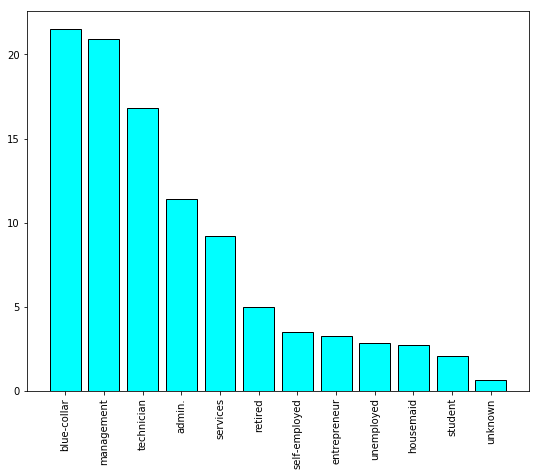

In [66]:
#plot the bar graph of percentage job categories
plt.figure(figsize=[9,7])
plt.bar(x.index,x,edgecolor='black',color='cyan')
plt.xticks(rotation=90)

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [67]:
#calculate the percentage of each education category.
inp1.education.value_counts()

secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: education, dtype: int64

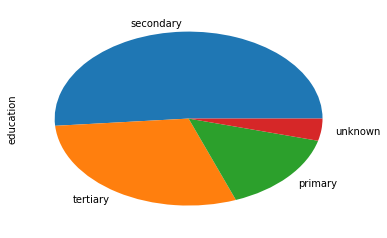

In [68]:
#plot the pie chart of education categories
inp1.education.value_counts().plot.pie()
plt.show()

#### poutcome 

In [69]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True)

unknown    0.817520
failure    0.108368
other      0.040721
success    0.033392
Name: poutcome, dtype: float64

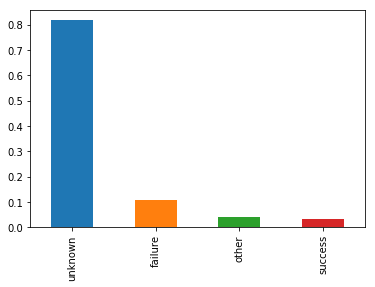

In [70]:
inp1.poutcome.value_counts(normalize=True).plot.bar()

#### Response the target variable 

In [71]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

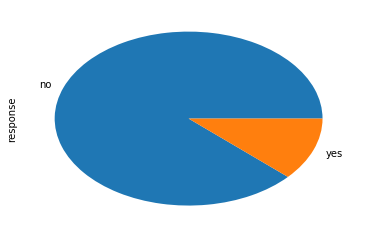

In [72]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()

### WHEN TO USE MEAN AND MEDIAN

While 'mean' gives an average of all the values, the 'median' gives a typical value that can be used to represent the entire group. 
As a simple rule of thumb, always question someone if they use 'mean' since 'median' is primarily a better measure of ‘representativeness’.

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

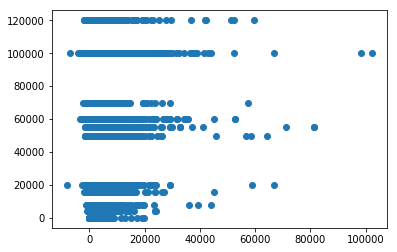

In [73]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.balance,inp1.salary)
plt.show()

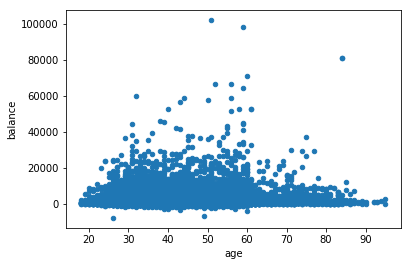

In [74]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x='age',y='balance')

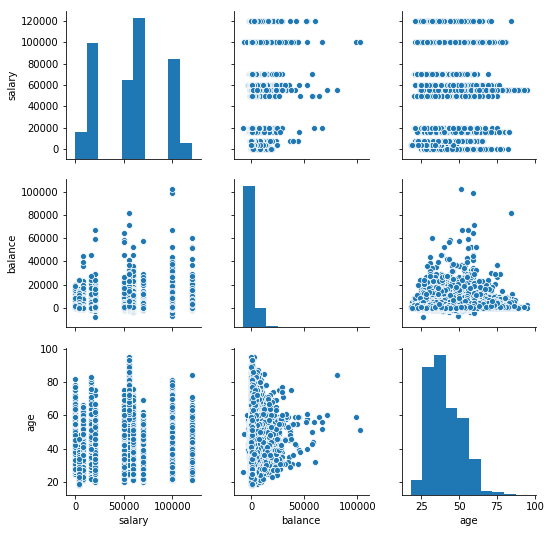

In [75]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=['salary','balance','age'])
plt.show()

#### Quantify Using Correlation values( **corr**)

In [76]:
inp1[['age','balance','salary']].corr()

,age,balance,salary
age,1.000000,0.097710,0.024513
balance,0.097710,1.000000,0.055489
salary,0.024513,0.055489,1.000000


#### Correlation heat map 

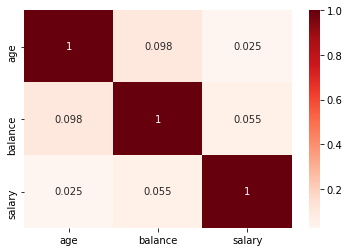

In [77]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[['age','balance','salary']].corr(),annot=True,cmap='Reds')

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [78]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby('response').mean().salary

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [79]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby('response').median().salary

response
no     60000
yes    60000
Name: salary, dtype: int64

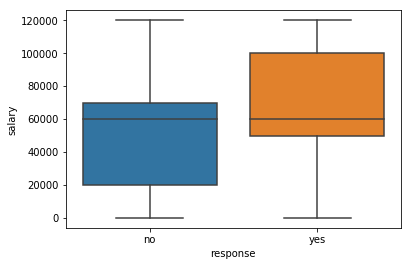

In [80]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x='response',y='salary')

#### Balance vs response 

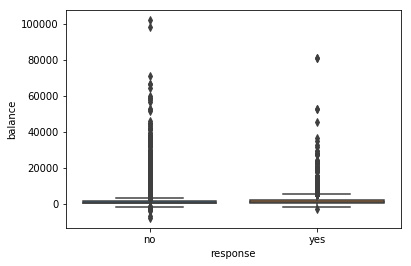

In [81]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1,x='response',y='balance')

In [82]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response').mean().balance

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [83]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response').median().balance

response
no     417
yes    733
Name: balance, dtype: int64

##### 75th percentile 

In [84]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)
inp1.groupby('response').balance.apply(p75)

response
no     1345.0
yes    2159.0
Name: balance, dtype: float64

In [85]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response').balance.aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


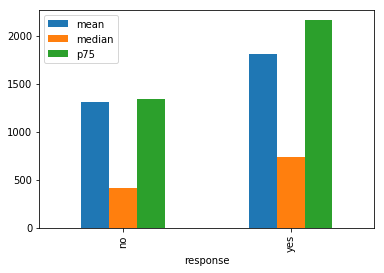

In [86]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby('response').balance.aggregate(['mean','median',p75]).plot.bar()

#### Education vs salary 

In [87]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education').mean().salary

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [88]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education').median().salary

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

#### Job vs salary

In [89]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job').mean().salary

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [90]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag']=inp1.response.apply(lambda x : 1 if x=='yes' else 0)

#### Education vs response rate

In [91]:
#calculate the mean of response_flag with different education categories.
inp1.groupby('education').mean().response_flag

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [92]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital').mean()

,age,salary,balance,day,duration,campaign,pdays,previous,response_flag
marital,,,,,,,,,
divorced,45.779531,60536.937284,1178.003655,15.803578,4.378588,2.631204,233.727371,0.549827,0.119469
married,43.409454,56198.234320,1426.871326,15.854000,4.223368,2.841530,222.339451,0.556447,0.101269
single,33.702614,57284.082016,1301.842229,15.708483,4.440867,2.650806,225.285881,0.642432,0.149554


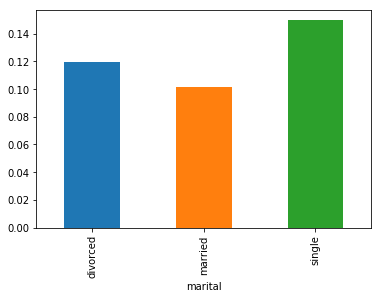

In [93]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby('marital').response_flag.mean().plot.bar()

#### Loans vs response rate 

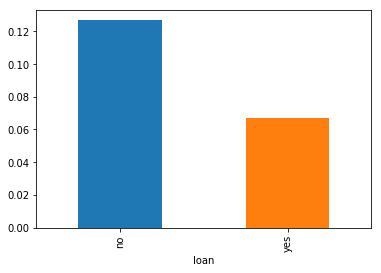

In [94]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan').mean().response_flag.plot.bar()

#### Housing loans vs response rate 

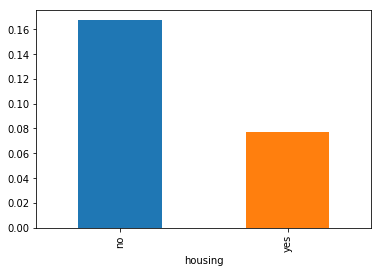

In [106]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby('housing').mean().response_flag.plot.bar()

### Age vs response **(IMPORTANT ANALYSIS)**

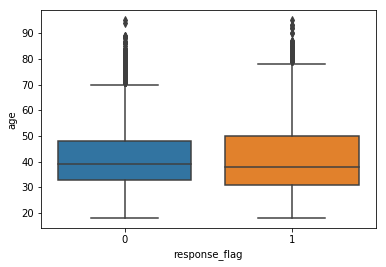

In [107]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1,x='response_flag',y='age')

##### making buckets from age columns 

In [114]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1['binned_age']=pd.cut(inp1.age,bins=[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])
inp1.binned_age.value_counts()

30-40    17662
40-50    11231
50-60     8057
<30       7025
60+       1186
Name: age, dtype: int64

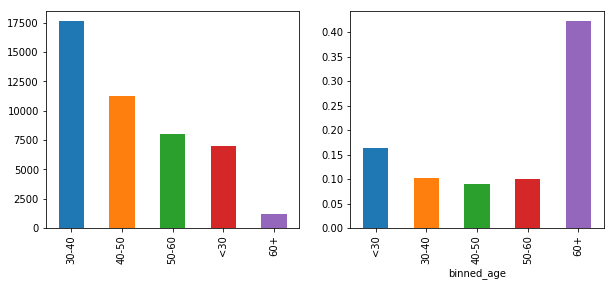

In [128]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.binned_age.value_counts().plot.bar()
plt.subplot(1,2,2)
inp1.groupby('binned_age').mean().response_flag.plot.bar()

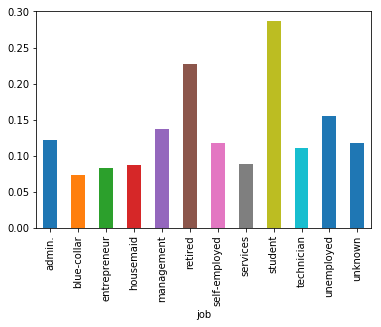

In [130]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby('job').mean().response_flag.plot.bar() 

### **The above analysis shows that the target audience for our campaigns must be either student or 60+ people who are targeted less**

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [149]:
#create heat map of education vs marital vs response_flag
x=inp1.pivot_table(values='response_flag',index='marital',columns='education')
x

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,0.138852,0.103559,0.137415,0.142012
married,0.075601,0.094650,0.129835,0.122519
single,0.106808,0.129271,0.183737,0.162879


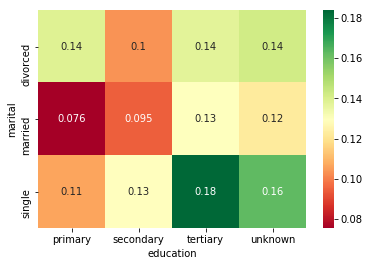

In [150]:
sns.heatmap(x,cmap='RdYlGn',annot=True)

#### Job vs marital vs response 

In [155]:
#create the heat map of Job vs marital vs response_flag.
y=inp1.pivot_table(values='response_flag',index='job',columns='marital')
y

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


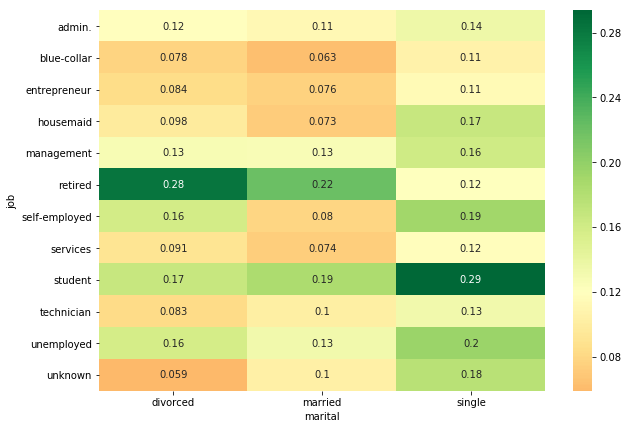

In [158]:
plt.figure(figsize=[10,7])
sns.heatmap(y,cmap='RdYlGn',annot=True,center=0.12)

#### Education vs poutcome vs response

In [170]:
#create the heat map of education vs poutcome vs response_flag.
z=inp1.pivot_table(values='response_flag',index='poutcome',columns='education')
z

education,primary,secondary,tertiary,unknown
poutcome,,,,
failure,0.088785,0.109007,0.168683,0.158192
other,0.143443,0.140831,0.220994,0.200000
success,0.609023,0.641902,0.657005,0.679012
unknown,0.071821,0.084244,0.114256,0.101761


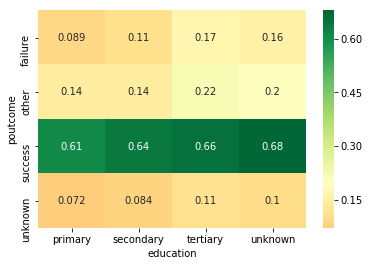

In [165]:
sns.heatmap(z,cmap='RdYlGn',annot=True,center=0.2)

In [166]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,binned_age
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40
